# Análisis de ventas de videojuegos para proyección 2017 

## Primera parte, procesamiento y limpieza de datos

In [1]:
import pandas as pd
from scipy import stats as st
from matplotlib import pyplot as plt       # Se importan las librerias necesarias.
import numpy as np
import seaborn as sns

In [2]:
df_games = pd.read_csv('/datasets/games.csv') #archivo a analizar.

In [3]:
df_games.info() # se utiliza info para ver el contenido de la tabla y el tipo de datos.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
display(df_games.head(20)) #display para ver el formato de la tabla, y obtener una primera vista a los datos con los que se va a trabajar.

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
df_games.columns = df_games.columns.str.lower() #se cambia el nombre de las columnas a minúsculas.

In [6]:
display(df_games.columns) #verificación del cambio anterior.

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [7]:
print(df_games.isna().sum()) #contar cuantos valores ausentes existen en las columnas.


name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64


In [8]:
df_games['year_of_release'] = df_games['year_of_release'].fillna(0)
df_games['year_of_release'] = df_games['year_of_release'].astype(int)  #se rellena el valor ausente dentro de la columna y se convierte a entero.


In [9]:
df_games.info()
print(df_games.isna().sum()) #verificación de los cambios anteriores.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB
name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score     

In [10]:
df_games['rating'] = df_games['rating'].fillna('RP')
print(df_games.isna().sum()) #Se rellenan los datos ausentes dentro de la columna con el contenido adecuado y se verifica el cambio anterior.

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating                0
dtype: int64


In [11]:
df_games['name'] = df_games['name'].fillna('Unknown')
df_games['genre'] = df_games['genre'].fillna('Unknown')
print(df_games.isna().sum()) #se rellenan los datos ausentes y se verifica el cambio.

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating                0
dtype: int64


In [12]:
df_games.info()
print(df_games.isna().sum()) #verificación con info() de los cambios anteriores y existencia de valores ausentes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           16715 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score     

In [13]:
df_games['user_score'] = df_games['user_score'].fillna('tbd')
df_games['critic_score'] = df_games['critic_score'].fillna('tbd') #se rellenan los valores ausentes de las columnas respectivas.

In [14]:
print(df_games.isna().sum()) #se verifica el cambio anterior.

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


In [15]:
print(df_games.duplicated().sum()) #Se revisa si existen filas duplicadas.

0


In [16]:
df_games.info() #ultima revisión para verificar que los datos han sido correctamente modificados.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  object 
 9   user_score       16715 non-null  object 
 10  rating           16715 non-null  object 
dtypes: float64(4), int64(1), object(6)
memory usage: 1.4+ MB


In [17]:
df_games['total_sales'] = df_games['na_sales'] + df_games['eu_sales'] + df_games['jp_sales'] + df_games['other_sales']
df_games['total_sales'] = df_games['total_sales'].astype(float)

#creación de una columna total_sales y modificación del dato a float.

In [18]:
display(df_games.head())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,tbd,tbd,RP,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,tbd,tbd,RP,31.38


**Cambios implementados:**

    1. El nombre de las columnas fue puesto en minúsculas
    2. En los juegos que hacia falta un rating se colocó 'RP' (Rate Pending), ya que esta es la clasificación oficial usada por ESRB para los juegos aun sin clasificar.
    3. Se cambió el tipo de dato de el año de lanzamiento a int
    4. Se modificaron datos ausentes dentro de 'genre' y 'name' a 'unknown'
    5. Dentro de 'critic_score' y 'user_score' se cambiaron los datos ausente por 'tbd' (to be determined)
    6. Se añadió la columna 'total_sales' 
    
Además de los cambios realizados se analizó si existian filas duplicadas (no existen).

## Análisis de datos

### Gráfico de ventas totales por plataforma

In [19]:
sales_per_platform = df_games.groupby(['platform'])['total_sales'].sum()
display(sales_per_platform)

platform
2600      96.98
3DO        0.10
3DS      259.00
DC        15.95
DS       806.12
GB       255.46
GBA      317.85
GC       198.93
GEN       30.77
GG         0.04
N64      218.68
NES      251.05
NG         1.44
PC       259.52
PCFX       0.03
PS       730.86
PS2     1255.77
PS3      939.65
PS4      314.14
PSP      294.05
PSV       54.07
SAT       33.59
SCD        1.86
SNES     200.04
TG16       0.16
WS         1.42
Wii      907.51
WiiU      82.19
X360     971.42
XB       257.74
XOne     159.32
Name: total_sales, dtype: float64

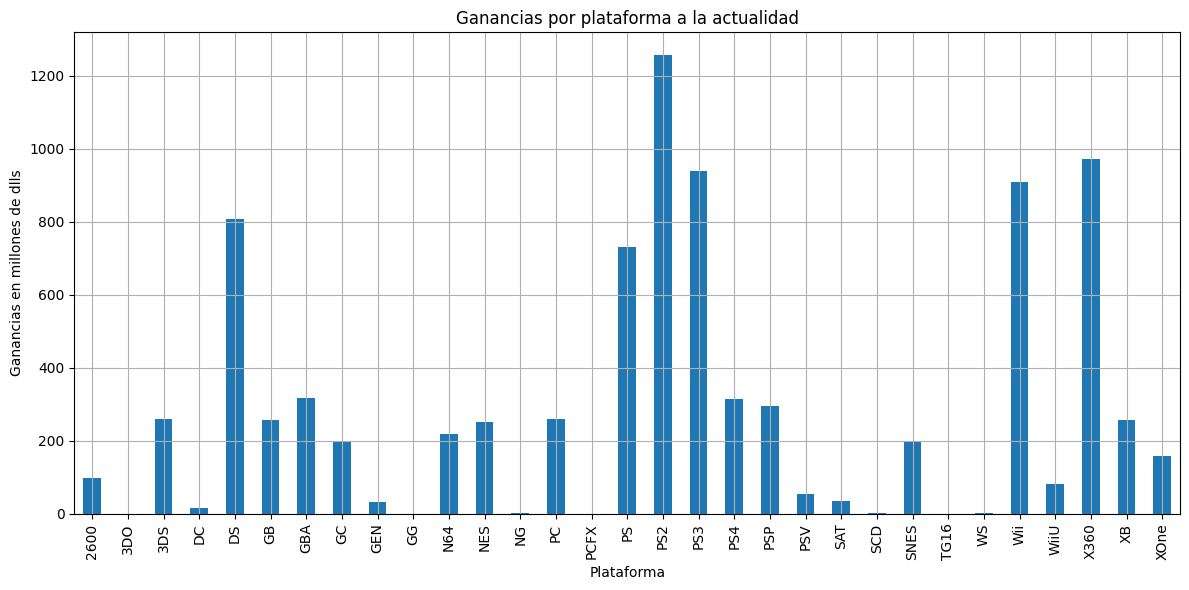

In [20]:
sales_per_platform.plot(kind = 'bar', figsize = (12, 6))
plt.title("Ganancias por plataforma a la actualidad")
plt.ylabel("Ganancias en millones de dlls")
plt.xlabel("Plataforma")
plt.grid(True)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()


**Observaciones:**

las 6 plataformas que más ganancias han generado han sido, DS, PS2, PS3, WII y Xbox 360; los proximos análisis se van a realizar sobre estas plataformas.

### Gráfico de ventas por decada por consola

In [21]:
df_games['decade'] = (df_games['year_of_release'] // 10) * 10
sales_per_decade = df_games.groupby(['platform', 'decade'])['total_sales'].sum().reset_index()
display(sales_per_decade.sort_values(['decade', 'total_sales'], ascending = False).head(50))

,platform,decade,total_sales
41,PS3,2010,587.74
60,X360,2010,550.41
42,PS4,2010,314.14
4,3DS,2010,257.81
56,Wii,2010,222.97
63,XOne,2010,159.32
10,DS,2010,123.75
31,PC,2010,121.96
57,WiiU,2010,82.19
45,PSP,2010,64.05


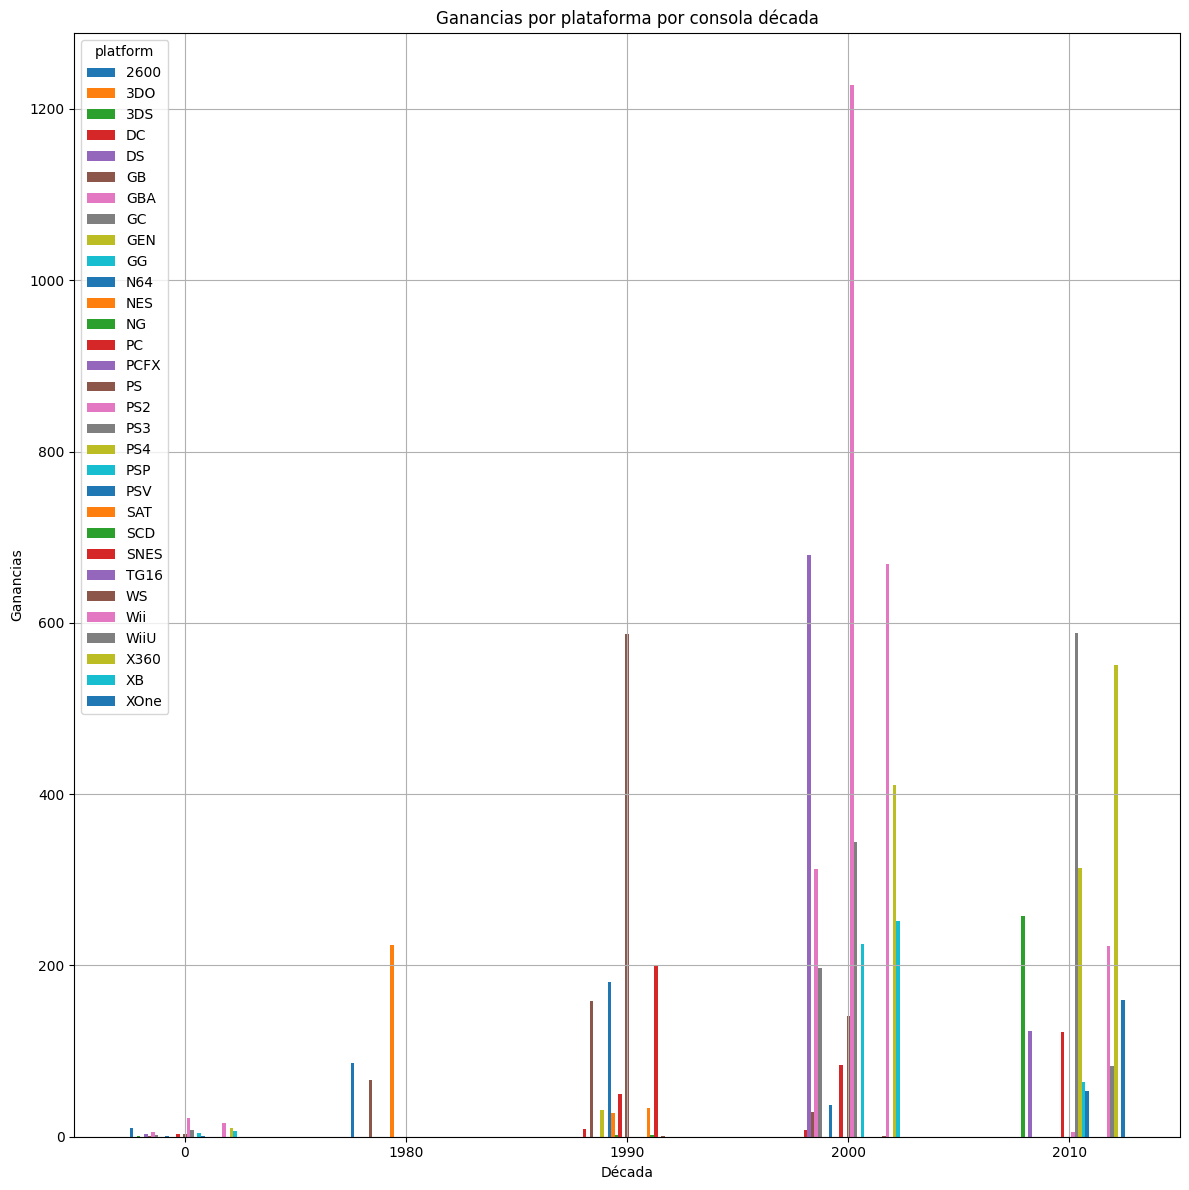

In [22]:
df_pivot = df_games.pivot_table(values = 'total_sales', index = 'decade', columns = 'platform', aggfunc = 'sum')
df_pivot.plot(kind = 'bar', figsize = (12,12))
plt.grid(True)
plt.title("Ganancias por plataforma por consola década")
plt.ylabel("Ganancias")
plt.xlabel("Década")
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()

**Observaciones:**

En la década de los 2000 fue la década en la que más ganancias ha generado una plataforma, esta siendo PS2 con más de 1200 Millones de dólares. Además de ser la década en la que mas plataformas han superado los 400 millones de dólares en ventas, a pesar de estas observaciones, debemos analizar si las plataformas que superaron dicha venta, continuaron con siendo relevantes dentro de la década de 2010.

### Gráfico de  ventas de consolas populares en los 2000 comparado con 2010 en adelante

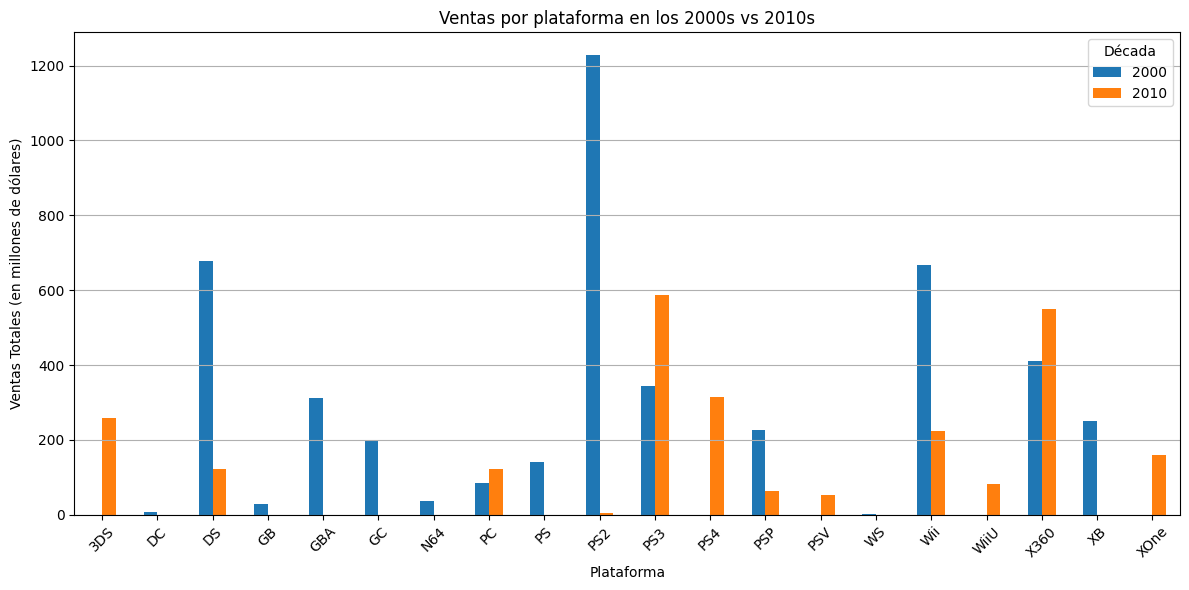

In [23]:
df_games['decade'] = (df_games['year_of_release'] // 10) * 10
df_filtrado = df_games[df_games['decade'].isin([2000, 2010])]
decade_sales = df_filtrado.groupby(['platform', 'decade'])['total_sales'].sum().reset_index()

pivot = decade_sales.pivot(index = 'platform', columns = 'decade', values = 'total_sales').fillna(0)

pivot.plot(kind = 'bar', figsize = (12, 6))

plt.title('Ventas por plataforma en los 2000s vs 2010s')
plt.xlabel('Plataforma')
plt.ylabel('Ventas Totales (en millones de dólares)')
plt.grid(axis = 'y')
plt.xticks(rotation = 45)
plt.legend(title = 'Década')
plt.tight_layout()
plt.show()

**Observaciones:**

A pesar de ser la consola que mas vendió durante la década de los 2000 el ps2 dejó de vender en la década de 2010, en el gráfico podemos observar que las consolas que mejor se han mantendio durante este perido de tiempo son el ps3 y el xbox 360, ya que ambos cuentan con ventas significativas en dicho periodo.

### Gráfico de cantidad de juegos por plataforma

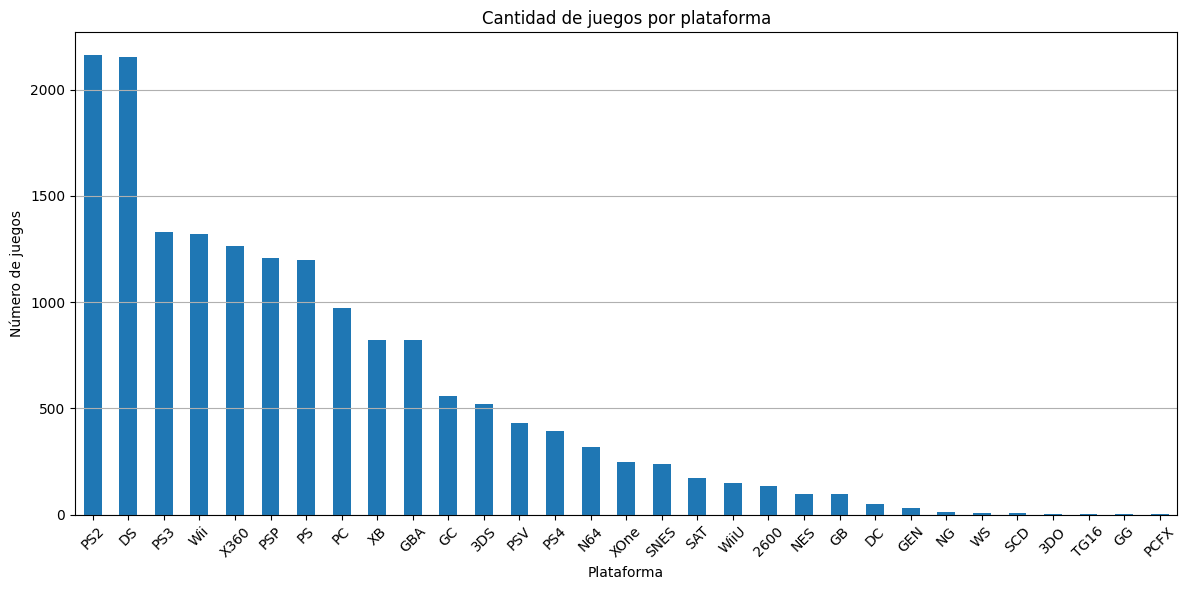

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
Name: platform, dtype: int64


In [24]:
games_per_platform = df_games['platform'].value_counts()


games_per_platform.plot(kind = 'bar', figsize = (12,6))
plt.title('Cantidad de juegos por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Número de juegos')
plt.xticks(rotation = 45)
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

print(games_per_platform.head(7))

**Observaciones:**

Analizando este gráfico junto con los anteriores podemos observar que el éxito en ventas en la plataforma xbox 360 puede llegar a igualar a el de ps2, ya que se encuentra solamente poco más de 200 mdd detrás de el ps2 con casi 900 juegos menos en su plataforma.

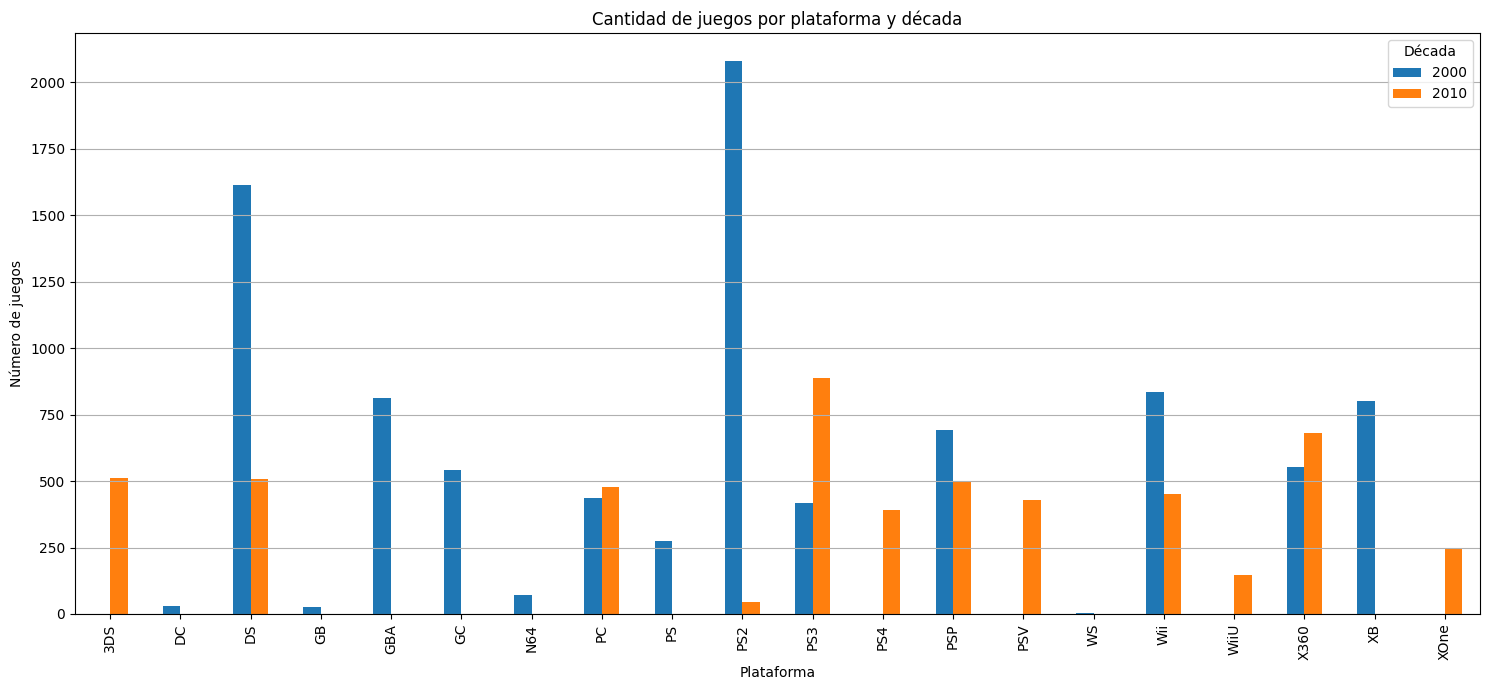

In [25]:
df_games['decade'] = (df_games['year_of_release'] // 10) * 10
conteo = df_filtrado.groupby(['platform', 'decade'])['name'].nunique().reset_index()
pivot = conteo.pivot(index = 'platform', columns = 'decade', values = 'name').fillna(0)
pivot.plot(kind = 'bar', figsize = (15, 7) )
plt.title("Cantidad de juegos por plataforma y década")
plt.xlabel("Plataforma")
plt.ylabel("Número de juegos")
plt.xticks(rotation = 90)
plt.legend(title = 'Década')
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

### Gráfico de cantidad de ganancias por cada género de videojuegos y número de juegos con dicho género

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Unknown            2.42
Name: total_sales, dtype: float64

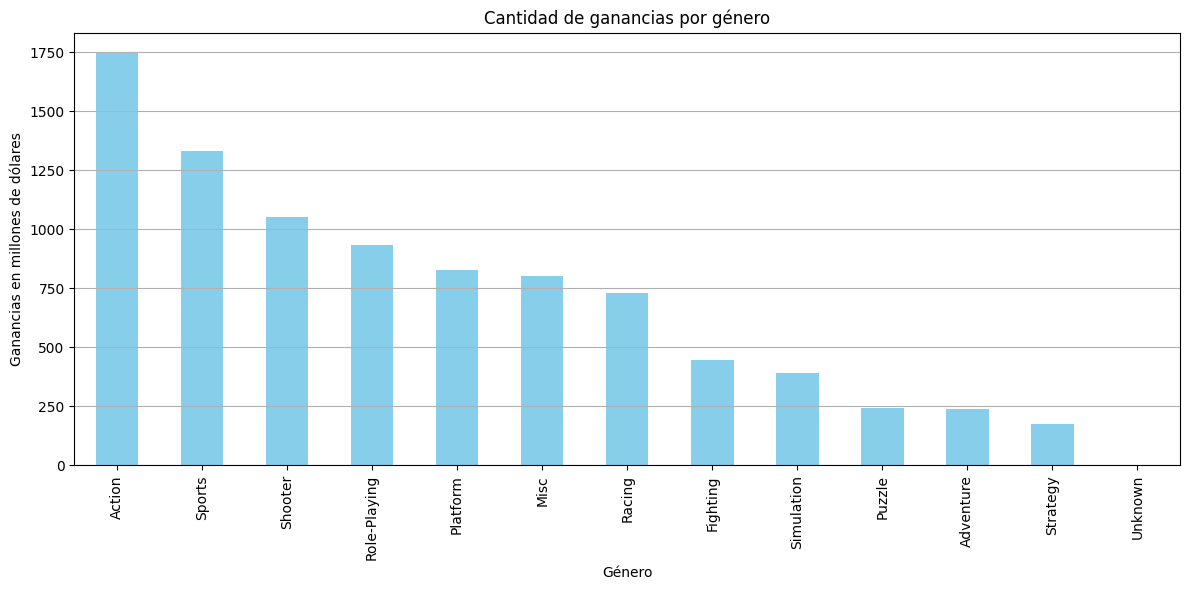

In [26]:
sales_per_genre = df_games.groupby('genre')['total_sales'].sum().sort_values(ascending = False)
display(sales_per_genre)

plot = sales_per_genre.plot(kind = 'bar', figsize = (12, 6), color = 'skyblue')
plt.title("Cantidad de ganancias por género")
plt.xlabel("Género")
plt.ylabel("Ganancias en millones de dólares")
plt.xticks(rotation = 90)
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Unknown            2
Name: genre, dtype: int64

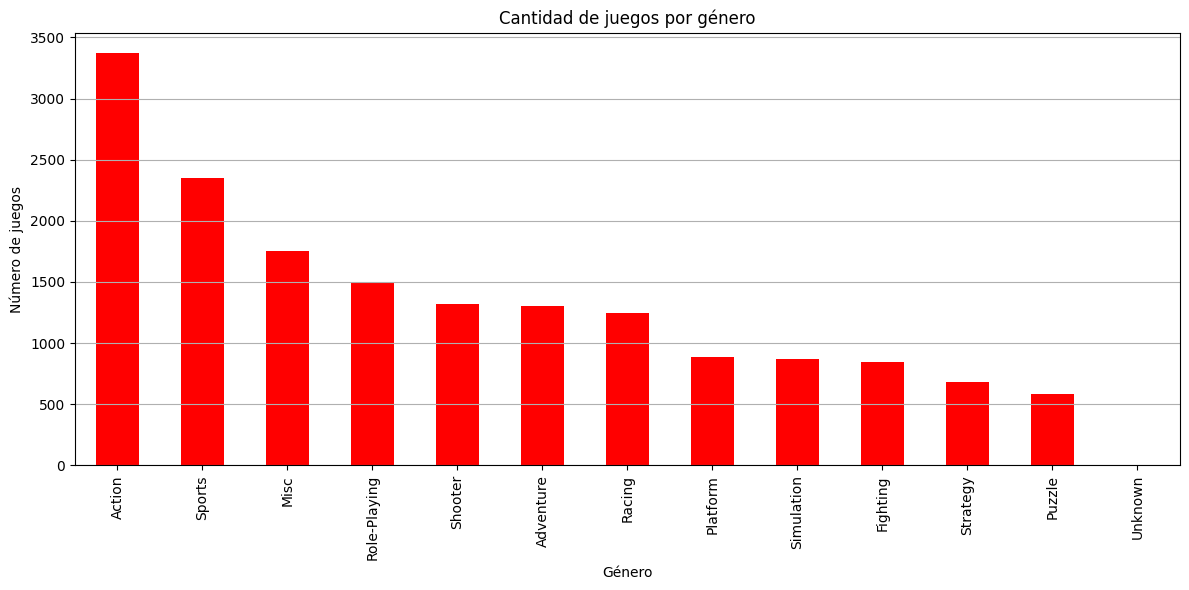

In [27]:
games_per_genre = df_games['genre'].value_counts().sort_values(ascending = False)
display(games_per_genre)

plot = games_per_genre.plot(kind = 'bar', figsize = (12, 6), color = 'red')
plt.title("Cantidad de juegos por género")
plt.xlabel("Género")
plt.ylabel("Número de juegos")
plt.xticks(rotation = 90)
plt.grid(axis = 'y')
plt.tight_layout()
plt.show()

**Observaciones:**

Analizando estos datos podemos inferir que los géneros más rentables son el de acción y deporte, pero no, el siguiente gráfico nos muestra la rentabilidad de cada género en base a las ventas que generó con la cantidad de juegos.

Platform        0.932173
Shooter         0.795503
Role-Playing    0.623872
Racing          0.583403
Sports          0.566980
Fighting        0.527126
Action          0.517711
Misc            0.458577
Simulation      0.446701
Puzzle          0.418224
Strategy        0.255095
Adventure       0.182341
dtype: float64


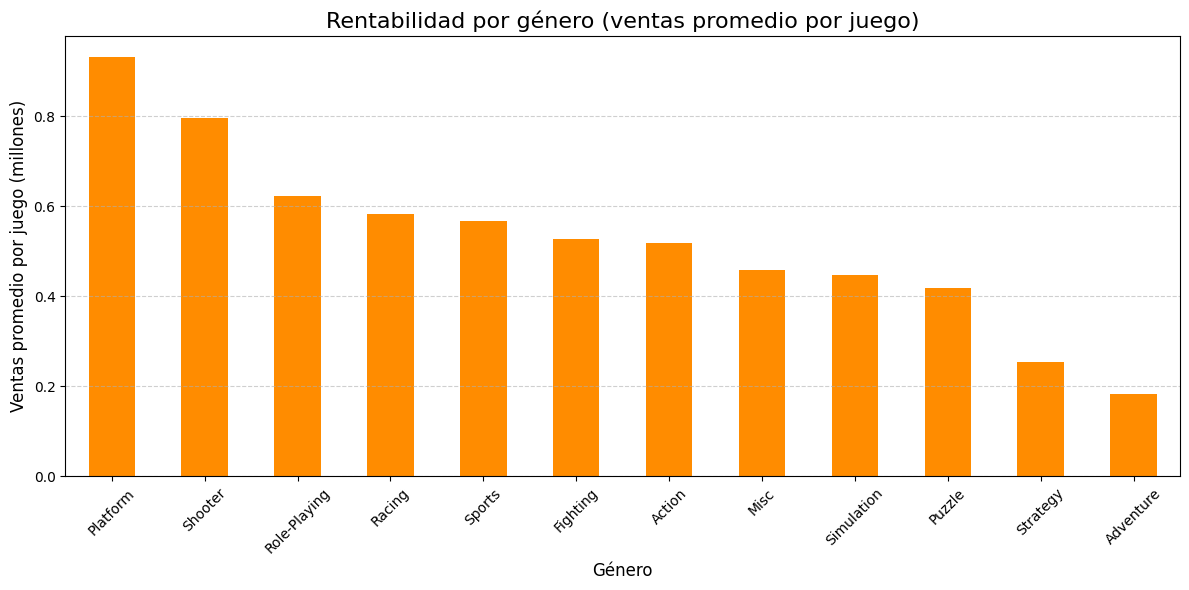

In [28]:
cantidad_por_genero = df_games['genre'].value_counts()
rentabilidad_genero = sales_per_genre / cantidad_por_genero
rentabilidad_genero = rentabilidad_genero.drop('Unknown', errors = 'ignore')
rentabilidad_genero = rentabilidad_genero.sort_values(ascending = False)

print(rentabilidad_genero)

rentabilidad_genero.plot(kind = 'bar', figsize = (12,6), color = 'darkorange')

plt.title("Rentabilidad por género (ventas promedio por juego)", fontsize = 16)
plt.ylabel("Ventas promedio por juego (millones)", fontsize = 12)
plt.xlabel("Género", fontsize = 12)
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha = 0.6)
plt.tight_layout()
plt.show()

**Observaciones:**

Una vez analizado este gráfico podemos ahora si inferir que los géneros más rentables son el de platforma y los shooters.

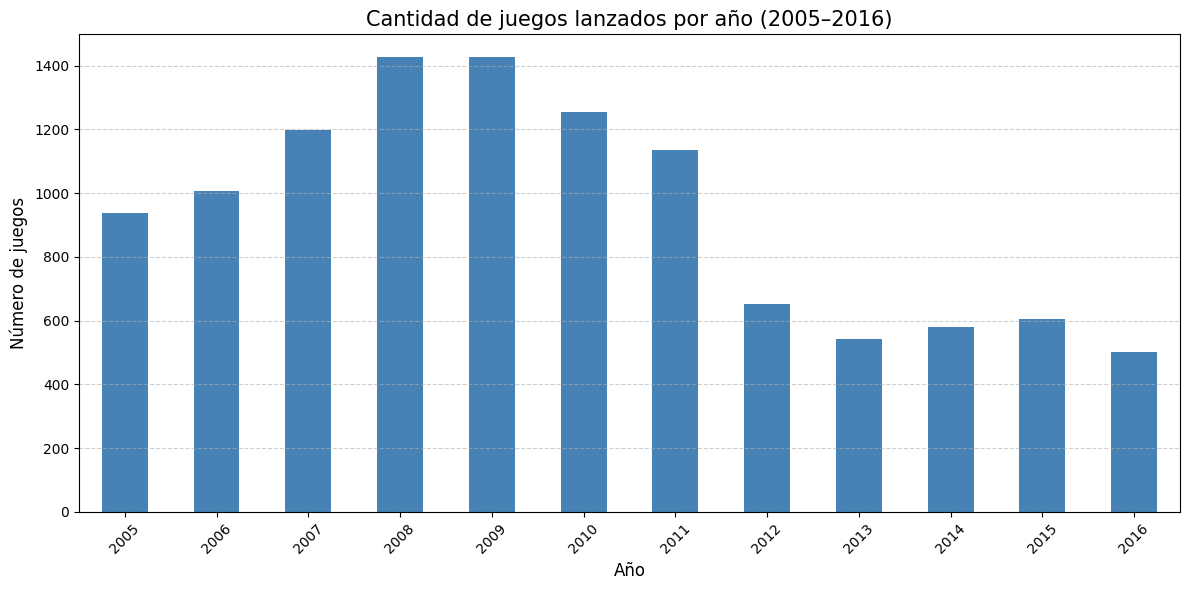

In [29]:
df_modelo = df_games[(df_games['year_of_release'] >= 2005) & (df_games['year_of_release'] <= 2016)]
games_per_year = df_modelo['year_of_release'].value_counts().sort_index()
games_per_year.plot(kind = 'bar', figsize=(12, 6), color = 'steelblue')
plt.title("Cantidad de juegos lanzados por año (2005–2016)", fontsize = 15)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Número de juegos", fontsize = 12)
plt.xticks(rotation = 45)
plt.grid(axis = 'y', linestyle = '--', alpha=0.6)
plt.tight_layout()
plt.show()

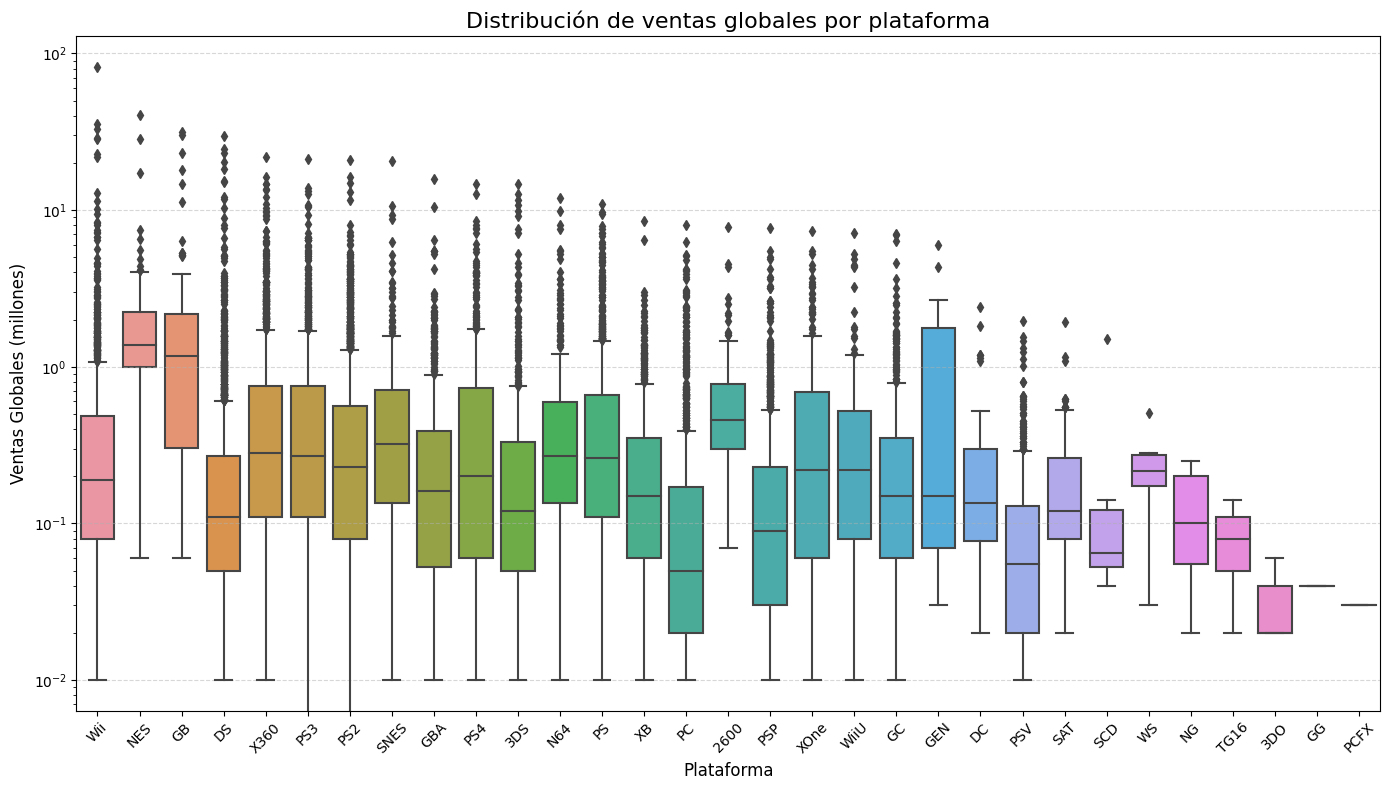

In [30]:
df_boxplot = df_games[df_games['total_sales'].notnull()]

plt.figure(figsize = (14, 8))
sns.boxplot(x = 'platform', y = 'total_sales', data = df_boxplot)
plt.title('Distribución de ventas globales por plataforma', fontsize = 16)
plt.xlabel('Plataforma', fontsize=12)
plt.ylabel('Ventas Globales (millones)', fontsize = 12)
plt.xticks(rotation = 45)
plt.yscale('log')
plt.grid(axis = 'y', linestyle = '--', alpha = 0.5)
plt.tight_layout()
plt.show()


**Observaciones:**

podemos observar que la mayoria de plataformas líderes en ventas, tienen demasiados juegos que se alejan de la media, asi mismo estas mismas plataformas tienen un valor mínimo muy bajo.
También se puede observar que muy pocas plataformas a pesar de tener múltiples valores atípicos tienden a tener datos visiblemente demasiado sesgados, y aquellas que si tienen datos fuertemente sesgados, tienen muy pocos valores atípicos.

In [31]:
top5_platforms_na = df_games.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head(5)
top5_platforms_eu = df_games.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head(5)
top5_platforms_jp = df_games.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Top 5 géneros por región
top5_genres_na = df_games.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)
top5_genres_eu = df_games.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)
top5_genres_jp = df_games.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

# Ventas por clasificación ESRB por región
esrb_na = df_games.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
esrb_eu = df_games.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
esrb_jp = df_games.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

print("Top 5 Plataformas por Región:")
print("\nNA:\n", top5_platforms_na)
print("\nEU:\n", top5_platforms_eu)
print("\nJP:\n", top5_platforms_jp)

print("Top 5 Géneros por Región:")
print("\nNA:\n", top5_genres_na)
print("\nEU:\n", top5_genres_eu)
print("\nJP:\n", top5_genres_jp)

print("Ventas por Clasificación ESRB:")
print("\nNA:\n", esrb_na)
print("\nEU:\n", esrb_eu)
print("\nJP:\n", esrb_jp)

Top 5 Plataformas por Región:

NA:
 platform
X360    602.47
PS2     583.84
Wii     496.90
PS3     393.49
DS      382.40
Name: na_sales, dtype: float64

EU:
 platform
PS2     339.29
PS3     330.29
X360    270.76
Wii     262.21
PS      213.61
Name: eu_sales, dtype: float64

JP:
 platform
DS      175.57
PS      139.82
PS2     139.20
SNES    116.55
3DS     100.67
Name: jp_sales, dtype: float64
Top 5 Géneros por Región:

NA:
 genre
Action      879.01
Sports      684.43
Shooter     592.24
Platform    445.50
Misc        407.27
Name: na_sales, dtype: float64

EU:
 genre
Action     519.13
Sports     376.79
Shooter    317.34
Racing     236.51
Misc       212.74
Name: eu_sales, dtype: float64

JP:
 genre
Role-Playing    355.41
Action          161.43
Sports          135.54
Platform        130.83
Misc            108.11
Name: jp_sales, dtype: float64
Ventas por Clasificación ESRB:

NA:
 rating
E       1292.99
RP      1242.46
T        759.75
M        748.48
E10+     353.32
K-A        2.56
EC         1

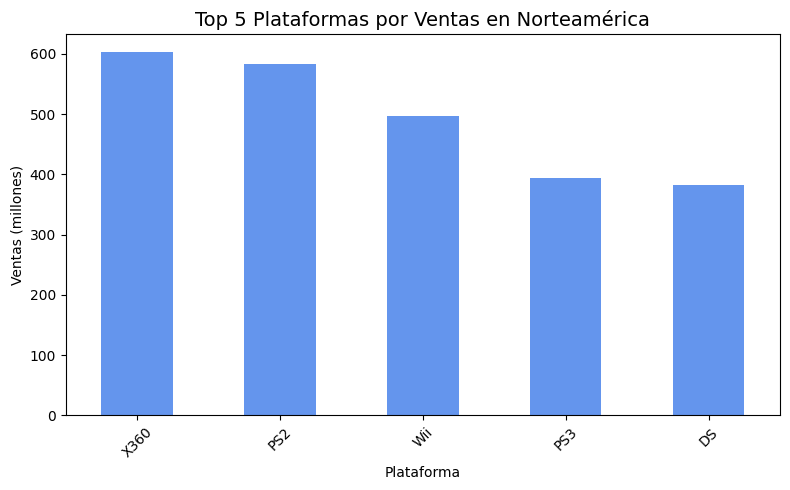

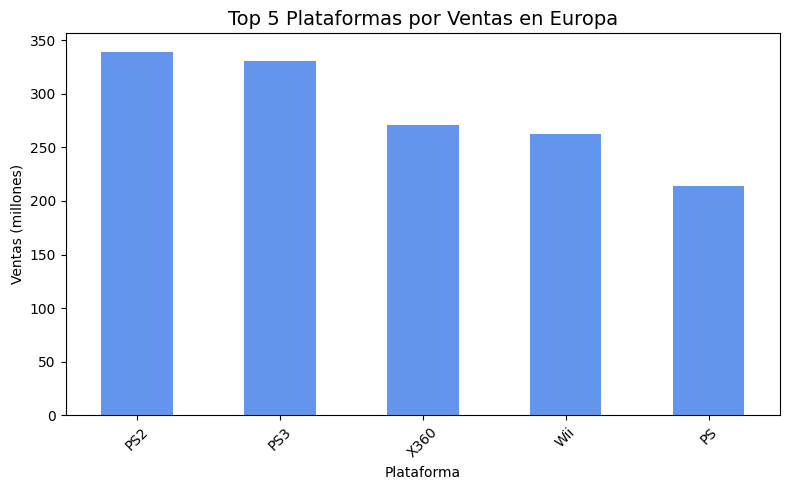

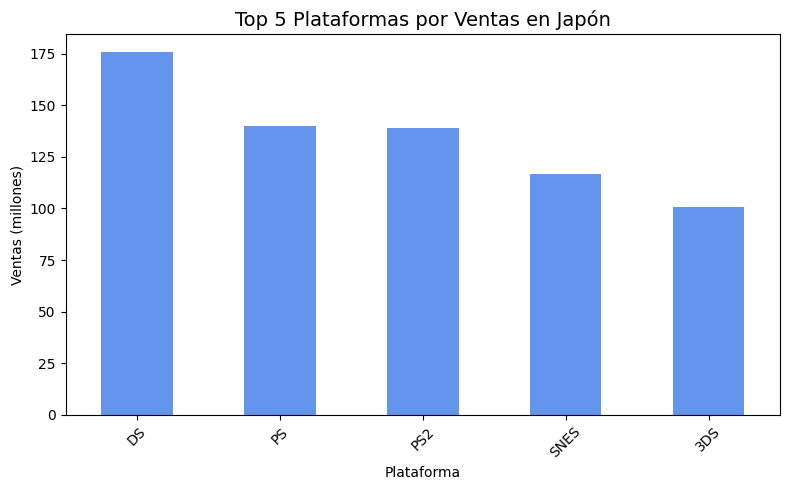

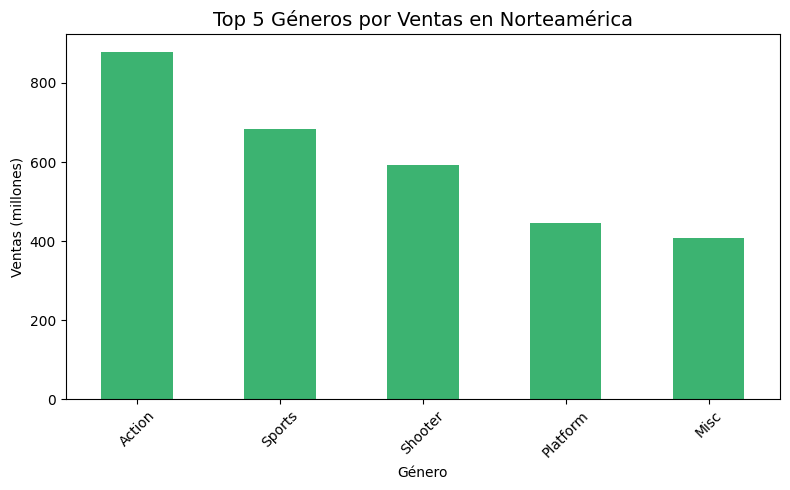

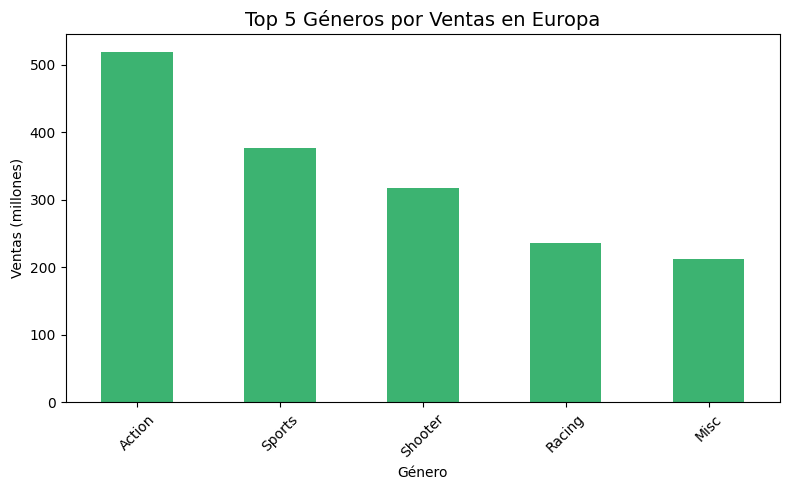

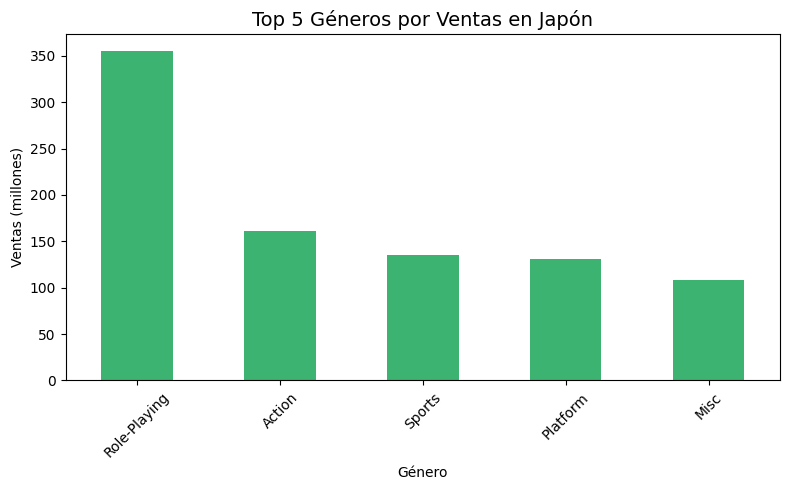

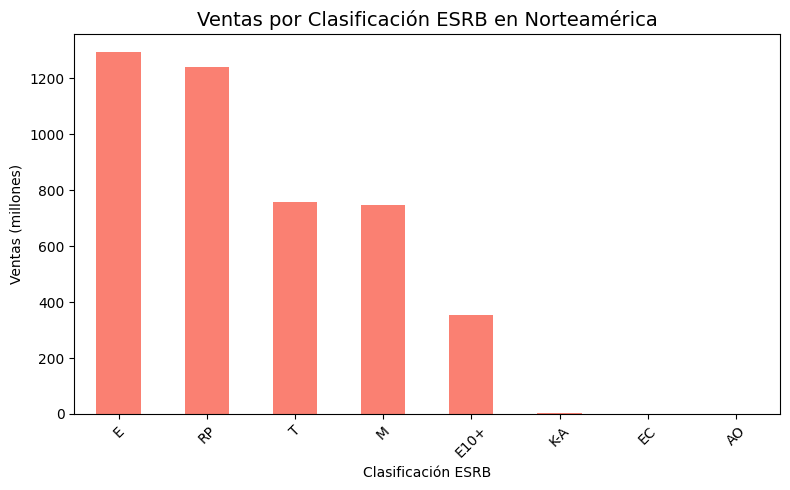

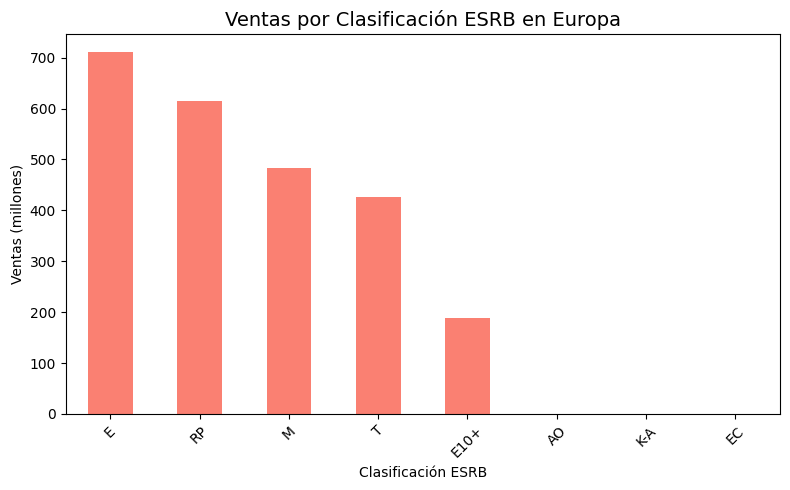

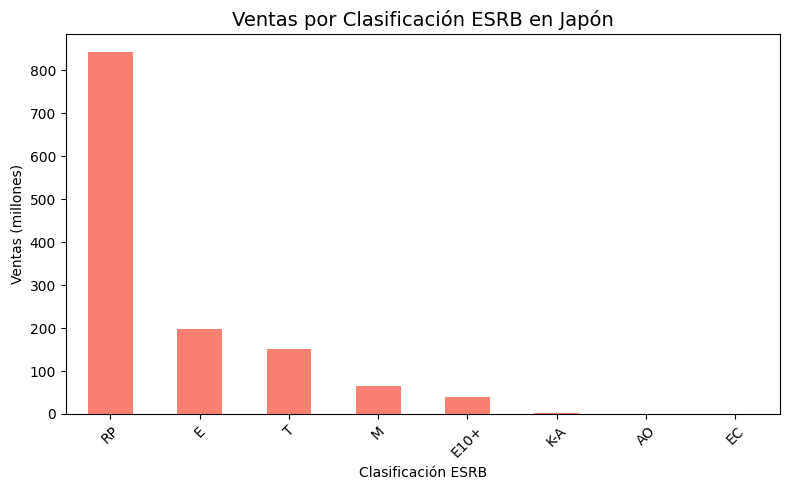

In [32]:
for region, label in zip(['na_sales', 'eu_sales', 'jp_sales'], ['Norteamérica', 'Europa', 'Japón']):
    top_platforms = df_games.groupby('platform')[region].sum().sort_values(ascending = False).head(5)
    top_platforms.plot(kind = 'bar', figsize = (8,5), color = 'cornflowerblue')
    plt.title(f"Top 5 Plataformas por Ventas en {label}", fontsize=14)
    plt.ylabel("Ventas (millones)")
    plt.xlabel("Plataforma")
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()
    
# 2. Top 5 Géneros por Región
for region, label in zip(['na_sales', 'eu_sales', 'jp_sales'], ['Norteamérica', 'Europa', 'Japón']):
    top_genres = df_games.groupby('genre')[region].sum().sort_values(ascending = False).head(5)
    top_genres.plot(kind = 'bar', figsize = (8,5), color = 'mediumseagreen')
    plt.title(f"Top 5 Géneros por Ventas en {label}", fontsize = 14)
    plt.ylabel("Ventas (millones)")
    plt.xlabel("Género")
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()

# 3. Ventas por Clasificación ESRB por Región
for region, label in zip(['na_sales', 'eu_sales', 'jp_sales'], ['Norteamérica', 'Europa', 'Japón']):
    esrb = df_games.groupby('rating')[region].sum().sort_values(ascending = False)
    esrb.plot(kind = 'bar', figsize = (8,5), color = 'salmon')
    plt.title(f"Ventas por Clasificación ESRB en {label}", fontsize = 14)
    plt.ylabel("Ventas (millones)")
    plt.xlabel("Clasificación ESRB")
    plt.xticks(rotation = 45)
    plt.tight_layout()
    plt.show()

In [33]:
df_games['user_score'] = pd.to_numeric(df_games['user_score'], errors='coerce')
xone_scores = df_games[(df_games['platform'] == 'XOne') & (df_games['user_score'].notnull())]['user_score']
pc_scores = df_games[(df_games['platform'] == 'PC') & (df_games['user_score'].notnull())]['user_score']


t_stat1, p_value1 = st.ttest_ind(xone_scores, pc_scores, equal_var=False)

action_scores = df_games[(df_games['genre'] == 'Action') & (df_games['user_score'].notnull())]['user_score']
sports_scores = df_games[(df_games['genre'] == 'Sports') & (df_games['user_score'].notnull())]['user_score']

t_stat2, p_value2 = st.ttest_ind(action_scores, sports_scores, equal_var=False)

print("Hipótesis 1 - XOne vs PC")
print(f"t-statistic: {t_stat1:.4f}, p-value: {p_value1:.4f}")
if p_value1 < 0.05:
    print("Rechazamos la hipotesis nula: Hay diferencia significativa entre las plataformas.\n")
else:
    print("No se rechaza la hipotesis nula: No hay evidencia suficiente de diferencia.\n")

print("Hipótesis 2 - Action vs Sports")
print(f"t-statistic: {t_stat2:.4f}, p-value: {p_value2:.4f}")
if p_value2 < 0.05:
    print("Rechazamos la hipotesis nula: Hay diferencia significativa entre los géneros.\n")
else:
    print("No se rechaza la hipotesis nula: No hay evidencia suficiente de diferencia.\n")

Hipótesis 1 - XOne vs PC
t-statistic: -4.6534, p-value: 0.0000
Rechazamos la hipotesis nula: Hay diferencia significativa entre las plataformas.

Hipótesis 2 - Action vs Sports
t-statistic: 1.5775, p-value: 0.1148
No se rechaza la hipotesis nula: No hay evidencia suficiente de diferencia.



## Conclusión

Después de todo el analisis previo y basandonos en la información que hemos obtenido, la campaña para 2017 tendrá los siguientes puntos:
    1. Para las regiones de Norteamérica y Europa la campaña es bastante similar. 
        1.1 Se a demostrado que la mayoria de juegos vendidos en estas regiones son los juegos de acción y deporte, se debe priorizar la venta de estos videojuegos; asi mismo la clasificación ESRB mas popular es E (Everyone).
        1.2 Las consolas que más se han vendido durante 2010 a la actualidad, son el PS3 y el Xbox360, con la salida de la siguiente generación de ambas consolas se puede realizar una campaña publicitaria al principio del año de las consolas PS3 y el Xbox360, para el resto del año realizar una campaña para las consolas y videojuegos de PS4 y Xbox One.
    2. Para la region de Japón en la estrategia puede ser un poco diferente.
        2.1 El género de videojuegos que mas se juegan en japón son los juegos de roleplay teniendo mas del doble en ventas que el género de acción, continuar promocionando este género sería lo ideal. 
        2.2 En cuanto a plataformas se ha demostrado que en esta región tienden a comprar mas las consolas de Playstation, realizar una campaña publicitaria al principio del PS3 para después realizar una del PS4 sería lo mejor para esta proyección 2017.